In [1]:
%reset

In [2]:
import numpy as np
import pandas as pd
import sklearn
from matplotlib import pyplot as plt
from datetime import datetime as dt
import re
import warnings
warnings.filterwarnings('ignore')

Data import

In [3]:
raw_data = pd.read_csv("incident_event_log.csv")
df = raw_data

In [4]:
df.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


In [5]:
df.dtypes

number                     object
incident_state             object
active                       bool
reassignment_count          int64
reopen_count                int64
sys_mod_count               int64
made_sla                     bool
caller_id                  object
opened_by                  object
opened_at                  object
sys_created_by             object
sys_created_at             object
sys_updated_by             object
sys_updated_at             object
contact_type               object
location                   object
category                   object
subcategory                object
u_symptom                  object
cmdb_ci                    object
impact                     object
urgency                    object
priority                   object
assignment_group           object
assigned_to                object
knowledge                    bool
u_priority_confirmation      bool
notify                     object
problem_id                 object
rfc           

In [6]:
dt_columns = ['opened_at', 'sys_created_at', 'sys_updated_at', 'resolved_at', 'closed_at']
date_time = df[dt_columns]
date_time = date_time.apply(lambda x: pd.to_datetime(x, dayfirst=True, format='%d/%m/%Y %H:%M', errors='coerce'))
date_time.head()

,opened_at,sys_created_at,sys_updated_at,resolved_at,closed_at
0,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-03-05 12:00:00
1,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 08:53:00,2016-02-29 11:29:00,2016-03-05 12:00:00
2,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-02-29 11:29:00,2016-02-29 11:29:00,2016-03-05 12:00:00
3,2016-02-29 01:16:00,2016-02-29 01:23:00,2016-03-05 12:00:00,2016-02-29 11:29:00,2016-03-05 12:00:00
4,2016-02-29 04:40:00,2016-02-29 04:57:00,2016-02-29 04:57:00,2016-03-01 09:52:00,2016-03-06 10:00:00


In [7]:
date_time['T_minutes_to_resolved'] = (date_time['resolved_at'] - date_time['opened_at']).dt.total_seconds() / 60
date_time[['opened_at', 'resolved_at', 'T_minutes_to_resolved']].head(10)

,opened_at,resolved_at,T_minutes_to_resolved
0,2016-02-29 01:16:00,2016-02-29 11:29:00,613.0
1,2016-02-29 01:16:00,2016-02-29 11:29:00,613.0
2,2016-02-29 01:16:00,2016-02-29 11:29:00,613.0
3,2016-02-29 01:16:00,2016-02-29 11:29:00,613.0
4,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0
5,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0
6,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0
7,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0
8,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0
9,2016-02-29 04:40:00,2016-03-01 09:52:00,1752.0


In [8]:
df[date_time.columns] = date_time

Check if the service have no night working hours

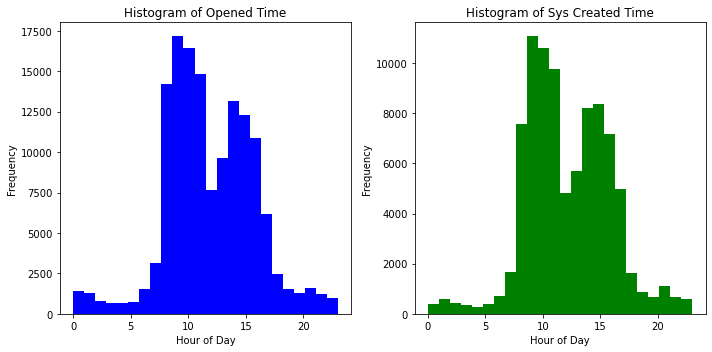

In [9]:
# Create histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['opened_at'].dt.hour, bins=24, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Opened Time')

plt.subplot(1, 2, 2)
plt.hist(df['sys_created_at'].dt.hour, bins=24, color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Sys Created Time')

plt.tight_layout()
plt.show()

-The service works at night.
-It seems there is NO difference between opened issue time and system created issue time

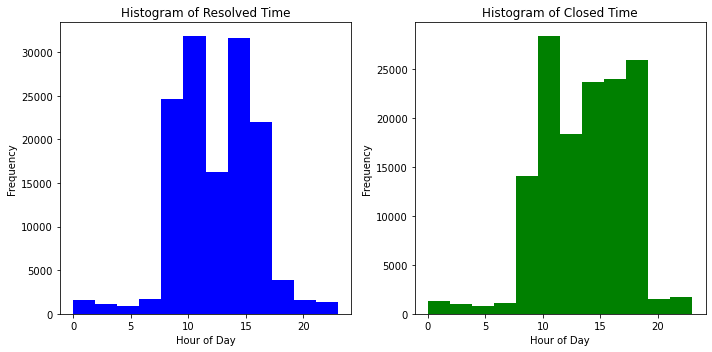

In [11]:
# Create histograms
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['resolved_at'].dt.hour, bins=12, color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Resolved Time')

plt.subplot(1, 2, 2)
plt.hist(df['closed_at'].dt.hour, bins=12, color='green')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.title('Histogram of Closed Time')

plt.tight_layout()
plt.show()

It seems there is difference between Resolved and Closed Time

In [10]:
# filter work hours ~8-18